In [13]:
from final_demo_util import set_up_demo, read_image_url
import requests
from PIL import Image

valid_dataset_names = {'LaST', 'Market1501', 'SYSU-30k'}
dataset_name = 'LaST'
trained_on_LaST = True

assert dataset_name in valid_dataset_names, "Invalid dataset!"

transform, demo, visualizer = set_up_demo(dataset_name, trained_on_LaST)

Loading model trained on LaST ...


'b1_head.classifier.weight' has shape (5000, 256) in the checkpoint but (0, 256) in the model! Skipped.
'b2_head.classifier.weight' has shape (5000, 256) in the checkpoint but (0, 256) in the model! Skipped.
'b21_head.classifier.weight' has shape (5000, 256) in the checkpoint but (0, 256) in the model! Skipped.
'b22_head.classifier.weight' has shape (5000, 256) in the checkpoint but (0, 256) in the model! Skipped.
'b3_head.classifier.weight' has shape (5000, 256) in the checkpoint but (0, 256) in the model! Skipped.
'b31_head.classifier.weight' has shape (5000, 256) in the checkpoint but (0, 256) in the model! Skipped.
'b32_head.classifier.weight' has shape (5000, 256) in the checkpoint but (0, 256) in the model! Skipped.
'b33_head.classifier.weight' has shape (5000, 256) in the checkpoint but (0, 256) in the model! Skipped.


/home/ubuntu/Nilay/PersonReIDModels/LUPerson-extended/fast-reid/logs/trained_on_last/model_final.pth
Use /home/ubuntu/Nilay/PersonReIDModels/Datasets as root_folder_path ...
Dataset statistics:
  --------------------------------------
  subset         | # ids     | # images
  --------------------------------------
  train          |  5000     |    71248
  query   (test)       |  5805     |    10176
  gallery (test)      |  5807     |   125353
Num query:  10176
Num gallery_images:  125353


Time to take get matches:  0.2567009925842285


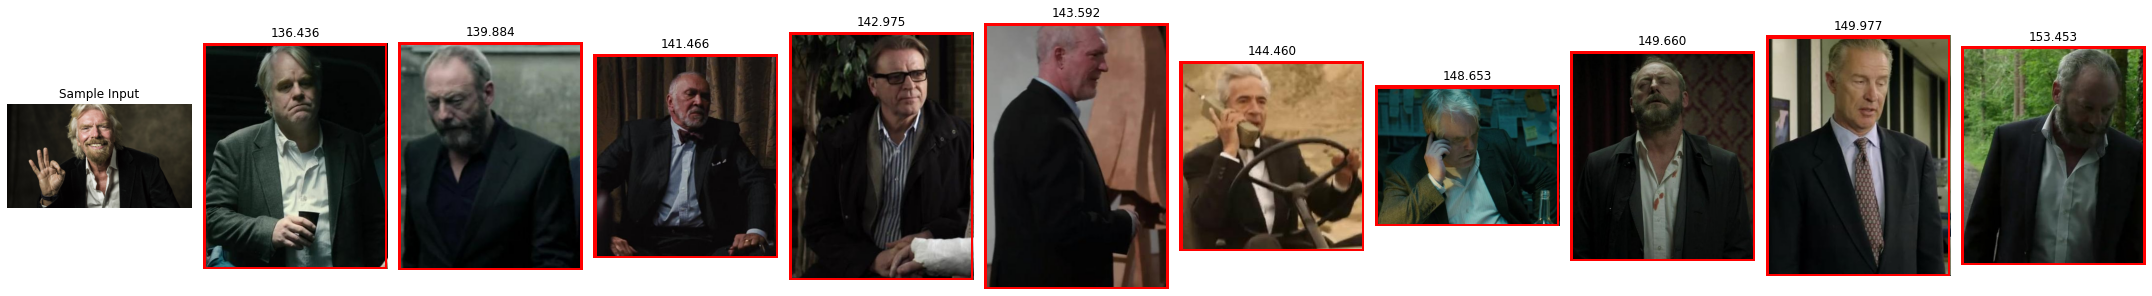

In [18]:
import gdown
drive_url = False
url = "https://deadline.com/wp-content/uploads/2016/04/richard-branson-dont-look-down.jpg"
if drive_url:
    url = 'https://drive.google.com/file/d/1lyUmgj0dhVOlt_XTJwvOiPGDB1cvqlvW/view?usp=sharing'
    filename = 'example.jpeg'
    gdown.download(url, filename, quiet=False, fuzzy=True)
    img = Image.open(filename)
else:
    img = Image.open(requests.get(url, stream=True).raw)

query_name = "Sample Input"

image_content = read_image_url(img)
image_content = transform(image_content)
image_content = image_content[None, :]
q_feat = demo.predictor(image_content).numpy()

visualizer.get_top_10(query_name, img, q_feat)